<a href="https://colab.research.google.com/github/heera-02/smartwatch-project/blob/main/smartwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Correct URL to the raw CSV file
url = "https://raw.githubusercontent.com/heera-02/smartwatch-project/main/smartwatch.csv"

# Load the dataset
data = pd.read_csv(url)

# Inspect the dataset
print(data.head())



   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


In [5]:
# Check for missing values and duplicates
print("Missing Values:\n", data.isnull().sum())
print("Duplicate Rows:", data.duplicated().sum())

Missing Values:
 Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64
Duplicate Rows: 0


In [7]:
# Fill missing values for numerical columns only
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# For categorical columns, you can fill missing values with a placeholder (e.g., 'Unknown') or mode
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Confirm no missing values remain
print("Missing Values After Handling:\n", data.isnull().sum())



Missing Values After Handling:
 Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


In [9]:
print(data.columns)



Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')


In [10]:
numerical_columns = ['age', 'steps', 'Heart Rate', 'calories', 'distance']


In [11]:
numerical_columns = [col for col in ['age', 'steps', 'heart_rate', 'calories', 'distance'] if col in data.columns]


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Verify and update numerical columns
numerical_columns = [col for col in ['age', 'steps', 'heart_rate', 'calories', 'distance'] if col in data.columns]

# Normalize only the available numerical columns
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.head())


   Unnamed: 0  X1       age  gender  height  weight     steps  hear_rate  \
0           1   1  0.052632       1   168.0    65.4  0.005704  78.531302   
1           2   2  0.052632       1   168.0    65.4  0.006115  78.453390   
2           3   3  0.052632       1   168.0    65.4  0.006526  78.540825   
3           4   4  0.052632       1   168.0    65.4  0.006937  78.628260   
4           5   5  0.052632       1   168.0    65.4  0.007348  78.715695   

   calories  distance  entropy_heart  entropy_setps  resting_heart  \
0  0.002958  0.000024       6.221612       6.116349           59.0   
1  0.033161  0.000025       6.221612       6.116349           59.0   
2  0.096751  0.000027       6.221612       6.116349           59.0   
3  0.103632  0.000029       6.221612       6.116349           59.0   
4  0.110513  0.000030       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520 

In [14]:
print(data.columns)



Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')


In [22]:
if 'gender' in data.columns and 'correct_column_name' in data.columns:
    sns.boxplot(x='gender', y='correct_column_name', data=data)
    plt.title('Heart Rate by Gender')
    plt.show()


In [23]:
if 'gender' in data.columns and 'HeartRate' in data.columns:
    sns.boxplot(x='gender', y='HeartRate', data=data)
    plt.title('Heart Rate by Gender')
    plt.show()


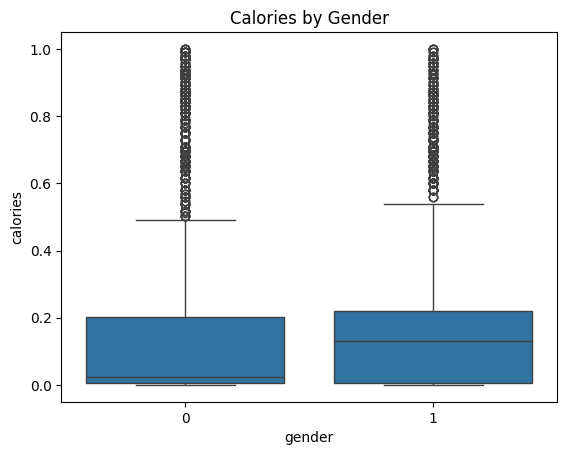

In [21]:
if 'gender' in data.columns and 'calories' in data.columns:
    sns.boxplot(x='gender', y='calories', data=data)
    plt.title('Calories by Gender')
    plt.show()


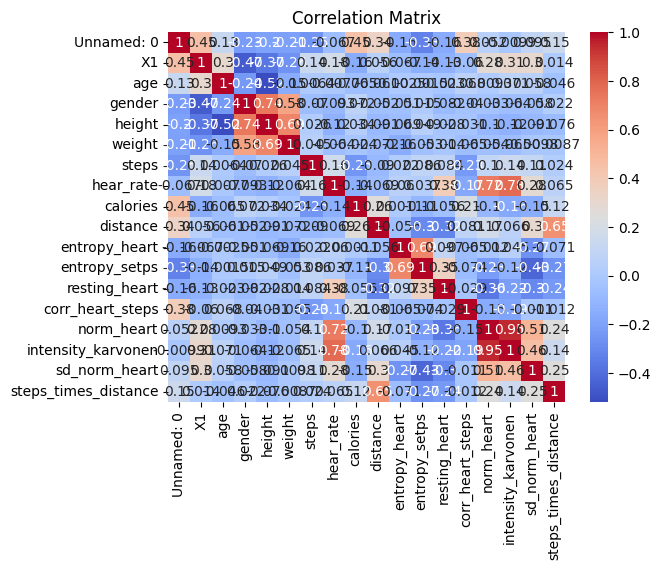

In [25]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



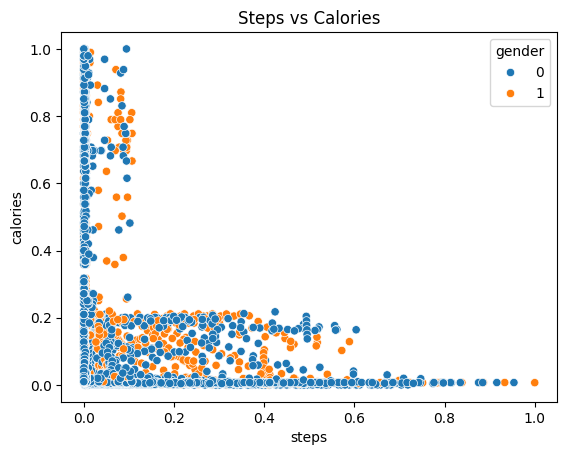

In [28]:
# Scatterplot for Steps vs Calories
sns.scatterplot(x='steps', y='calories', hue='gender', data=data)
plt.title('Steps vs Calories')
plt.show()


In [29]:
# Example: Steps-Distance Ratio
data['steps_distance_ratio'] = data['steps'] / (data['distance'] + 1e-5)  # Avoid division by zero
print(data.head())


   Unnamed: 0  X1       age  gender  height  weight     steps  hear_rate  \
0           1   1  0.052632       1   168.0    65.4  0.005704  78.531302   
1           2   2  0.052632       1   168.0    65.4  0.006115  78.453390   
2           3   3  0.052632       1   168.0    65.4  0.006526  78.540825   
3           4   4  0.052632       1   168.0    65.4  0.006937  78.628260   
4           5   5  0.052632       1   168.0    65.4  0.007348  78.715695   

   calories  distance  ...  entropy_setps  resting_heart  corr_heart_steps  \
0  0.002958  0.000024  ...       6.116349           59.0          1.000000   
1  0.033161  0.000025  ...       6.116349           59.0          1.000000   
2  0.096751  0.000027  ...       6.116349           59.0          1.000000   
3  0.103632  0.000029  ...       6.116349           59.0          1.000000   
4  0.110513  0.000030  ...       6.116349           59.0          0.982816   

   norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  \


In [31]:
print(data.columns)



Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity',
       'steps_distance_ratio'],
      dtype='object')


In [33]:
# Print available columns
print("Available columns in dataset:", data.columns)

# Dynamically select valid feature columns
feature_columns = [col for col in ['steps', 'heart_rate', 'distance'] if col in data.columns]

# Ensure the target column exists
if 'calories' in data.columns:
    X = data[feature_columns]
    y = data['calories']

    # Proceed with modeling
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")
else:
    print("Target column 'calories' not found in the dataset.")



Mean Squared Error: 0.06352692785248763
